In [77]:
%pip install xgboost

5494.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [78]:
# Main Libraries
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Machine Learning Library (sklearn)
# ML - Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin, clone
# ML - Feature Selection
from sklearn.feature_selection import SelectKBest, SelectFromModel

# ML - Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
# ML - Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, LearningCurveDisplay, ValidationCurveDisplay, StratifiedKFold, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
# ML - Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# ML - Model Interpretation
from sklearn.inspection import permutation_importance, partial_dependence
# ML - Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, PrecisionRecallDisplay

# Imbalance Library
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Advance Feature Engineering
from feature_engine.imputation import MeanMedianImputer, AddMissingIndicator
from feature_engine.creation import CyclicalFeatures
from feature_engine.encoding import RareLabelEncoder

from category_encoders import BinaryEncoder
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Section 1 Business Understanding

## 1.1 Context

PT Telco is a telecommunication company that provides internet services to customers in a specific region. With increasingly demands of internet connectivity continues to grow, PT Telco has expanded rapidly to serve thousands to millions of customers. Thousands of customers subscribed to internet services from PT Telco every month. 

To ensure customer loyalty and prevent them from switching to competitors, the marketing team develops strategies aimed at improving customer retention. A key step in this process is collecting and analyzing comprehensive customer transaction data. By leveraging this data, the company can monitor customer churn rates and implement effective preventive actions, ultimately supporting customer loyalty and achieving the company’s long-term goals.

The main business objective is to reduce customer churn and increase customer lifetime value through data driven decision making.

## 1.2 Problem Statement

PT Telco core businesses is providing internet services to customers. As competition in the internet service industry increases, the company faces challenges in retaining customers and sustaining long-term revenue. One of the main issues is the decline in Customer Lifetime Value (CLV) caused by customers cancelling their subscriptions and switching to competitors. To avoid more customer losses, marketing team has identified key problems points to solve by the company.

Nature Problem :
- Difficulty in maintaining customer loyalty
- Increasing customer churn
- Reducing customer acquisition costs

Objectives :
- Implement a targeted marketing campaign for potential customer churn
- Maintain and improves customer relationship management 
- Improve products and services quality to enhance customers satisfaction

## 1.3 Goals

According to the problem statement, PT Telco needs to solve this issues effectively using facts and data regarding customer churn. PT Telco should set strategies to enhance customer lifetime value to prevents customer churn in the future. Therefore, company should implement a better marketing campaign for targeted customer, and also maintain and improving products and services quality to increased customer loyalty.

## 1.4 Analytical Approach

To address the churn problem, we use a data-driven analytical approach. The process starts by exploring and cleaning the dataset to understand customer behavior and identify key variables related to churn. Next, we apply feature engineering and build several machine learning classification models, such as Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM to predict whether a customer will churn or stay. We benchmark these models using cross validation and various performance metrics to find the best balance between accuracy, recall, and interpretability. After selecting the most suitable model, we evaluate it on unseen test data and interpret the results to generate insights that can support the company’s customer retention strategy.

## 1.5 Evaluation Metric

Type 1 Error (False Positive):
The model predicts a customer will churn when in reality they will stay.
→ Consequence: The company wastes effort, time, and marketing costs targeting customers who were actually loyal.

Type 2 Error (False Negative):
The model predicts a customer will stay when in reality they will churn.
→ Consequence: The company loses potential revenue because it fails to retain customers who are actually at risk of leaving.
Based on these consequences, the goal is to build a model that can reduce churn-related revenue loss while keeping retention costs efficient.

In other words, we want to correctly identify as many real churners as possible (high recall), while minimizing false positives that waste marketing resources.

Therefore, our main evaluation metric will be the ROC-AUC score, as it provides a balanced view of how well the model can distinguish between churn and non-churn customers across all thresholds.

# Section 2 Data Understanding

## 2.1 General Information

In [79]:
df = pd.read_csv('data_telco_customer_churn.csv')

In [80]:
print("General Information:")
display(df.info())

print("5 First Rows:")
display(df.head())

print("5 Last Rows:")
display(df.tail())

print("5 Random Rows:")
display(df.sample(5))

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


None

5 First Rows:


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


5 Last Rows:


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes
4929,Yes,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.40,No


5 Random Rows:


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
3627,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.40,No
3553,No,13,Yes,No,Fiber optic,No,No,Month-to-month,Yes,100.35,Yes
4137,No,36,Yes,No,DSL,Yes,No,One year,No,35.35,No
424,Yes,61,No,Yes,Fiber optic,No,No,Month-to-month,Yes,99.15,Yes
3327,No,31,No,No,Fiber optic,Yes,No,One year,Yes,90.70,No


## 2.2 Feature Information

| **Nama Fitur**           | **Deskripsi**                                                                | **Impact to Business**                                                                                                    |
| ------------------------ | ---------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| `Dependents`     | Whether the customer has dependents or not.                               | Customers with dependents are usually more stable and less likely to churn. Lower priority for retention campaigns. |
| `tenure`       | Number of months the customer has stayed with the company.                                           | Short-tenure customers have a much higher churn risk. Early retention offers (e.g., discounts in first 6–12 months) can reduce churn.                          |
| `OnlineSecurity`               | Whether the customer has online security or not.                                                  | Add-on services increase customer stickiness and reduce churn. Can be used as part of a “loyalty bundle” strategy.             |
| `OnlineBackup`              | Whether the customer has online backup or not.                                 | More subscribed services = higher product dependency = lower churn probability.                                                     |
| `InternetService`                | Whether the client is subscribed to Internet service.                                                         | Certain service types (e.g., slow DSL) may have higher churn rates. Insights useful for infrastructure upgrades and targeted offers.            |
| `DeviceProtection` | Whether the client has device protection or not.                                   | Having protection services increases switching cost and reduces churn likelihood.                                                     |
| `TechSupport`   | Whether the client has tech support or not.                          | Lack of support leads to frustration → strong churn driver. Free support can be offered to high-risk customers.                                                             |
| `Contract`      | Type of contract according to duration.                             | Month-to-month users churn the most. Annual contracts significantly reduce churn → contract upgrade incentives are effective.                                                   |
| `PaperlessBilling`         | Bills issued in paperless form.                                  | Paperless customers are typically more digital and easier to switch providers. However, they also reduce operational cost.                                                               |
| `MonthlyCharges` | Amount of charge for service on monthly bases.                              | Higher charges often lead to higher churn risk. Price-sensitive segments need discount or alternative plans.                                       |
| `Churn`       | Whether the customer churns or not.                                         | Main business outcome. Predicting churn allows proactive retention action (discounts, loyalty rewards, call-center outreach).                       |

## 2.3 Statistics Summary

In [81]:
print("Numerical Summary:")
display(df.describe())

print("Categorical Summary:")
display(df.describe(include='object'))

Numerical Summary:


,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Categorical Summary:


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


# Section 3 Data Generation

In [82]:
# Creating a copy of the DataFrame for manipulation
df_eda = df.copy()

# Section 4 Data Exploration & Cleaning

In [83]:
%pip install skrub

5500.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [84]:
from skrub import TableReport


# General table report
report = TableReport(df_eda)
report

Processing column  11 / 11


,,,,,,,,,,,


There are some missing or empty values in a few columns, and the `Dependents` column isn’t useful for analysis or modeling. So we clean up all the data, fix whatever’s missing, and get everything into a proper, ready-to-use format for analysis and building our machine learning models.

In [85]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[68, 26]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[No, No internet service]"
4,InternetService,object,0,0.0,3,"[No, Fiber optic]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service]"
6,TechSupport,object,0,0.0,3,"[Yes, No]"
7,Contract,object,0,0.0,3,"[Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[108.6, 109.25]"


## 4.1 Identify Missing Values

In this step, we check how many missing values each column has.
First, we count the total number of null (empty) entries in every column.
If there are missing values, we convert the numbers into a friendlier format that shows both the count and the percentage.
But if the dataset has no missing values at all, we simply print “No missing values found.”
Basically, this step helps us understand whether we need to handle any incomplete data before moving forward.

In [86]:
# Total missing values per column
null_values = df.isnull().sum()

if null_values.any():
    null_values.apply(lambda x: f"{x} ({x/df.shape[0]:.2%})")
else:
    print("No missing values found.")

No missing values found.


## 4.2 Identify Duplicated Values

In [87]:
# Exact Duplicate
if df.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df.duplicated().sum())
    duplicated_row = df[df.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

Duplicate rows found.
Total duplicate rows: 77


In [88]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
3246,No,1,No,No,DSL,No,No,Month-to-month,No,25.05,Yes
3863,No,1,No,No,DSL,No,No,Month-to-month,No,25.05,Yes
436,No,1,No,No,DSL,No,No,Month-to-month,No,25.25,No
4452,No,1,No,No,DSL,No,No,Month-to-month,No,25.25,No
871,No,1,No,No,DSL,No,No,Month-to-month,No,44.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1968,Yes,66,No internet service,No internet service,No,No internet service,No internet service,Two year,Yes,25.30,No
3092,Yes,71,No internet service,No internet service,No,No internet service,No internet service,Two year,No,23.90,No
3677,Yes,71,No internet service,No internet service,No,No internet service,No internet service,Two year,No,23.90,No
1198,Yes,72,Yes,Yes,DSL,Yes,Yes,Two year,Yes,64.80,No


## 4.3 Delete unused Column : `Dependents`

Since Dependents turns out to have very weak correlation and doesn’t really help the analysis or prediction, we remove the column from the dataset.
Once the column is dropped, we recreate the summary table (dfDesc) to show the updated information for all remaining features — including data types, missing values, and samples of unique values.
Basically, this step cleans up the data by removing an unimportant feature and refreshes the dataset overview.

In [89]:
df.drop(['Dependents'],axis=1, inplace=True)

In [90]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,tenure,int64,0,0.0,73,"[26, 23]"
1,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"
2,OnlineBackup,object,0,0.0,3,"[No, Yes]"
3,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
4,DeviceProtection,object,0,0.0,3,"[No, No internet service]"
5,TechSupport,object,0,0.0,3,"[No, Yes]"
6,Contract,object,0,0.0,3,"[Month-to-month, One year]"
7,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
8,MonthlyCharges,float64,0,0.0,1422,"[57.2, 81.1]"
9,Churn,object,0,0.0,2,"[Yes, No]"


## 4.4 Converting Churn Column into Binary Numbers.

In this step, we convert the values in the Churn column from text (“Yes” or “No”) into numerical values (1 and 0).
Machine learning models work best with numbers, so changing:
Yes → 1
No → 0
makes the column easier to use for analysis and modeling.
Basically, we're turning the target variable into a numeric format so the model can understand it.

In [91]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## Section 5 Data Analysis


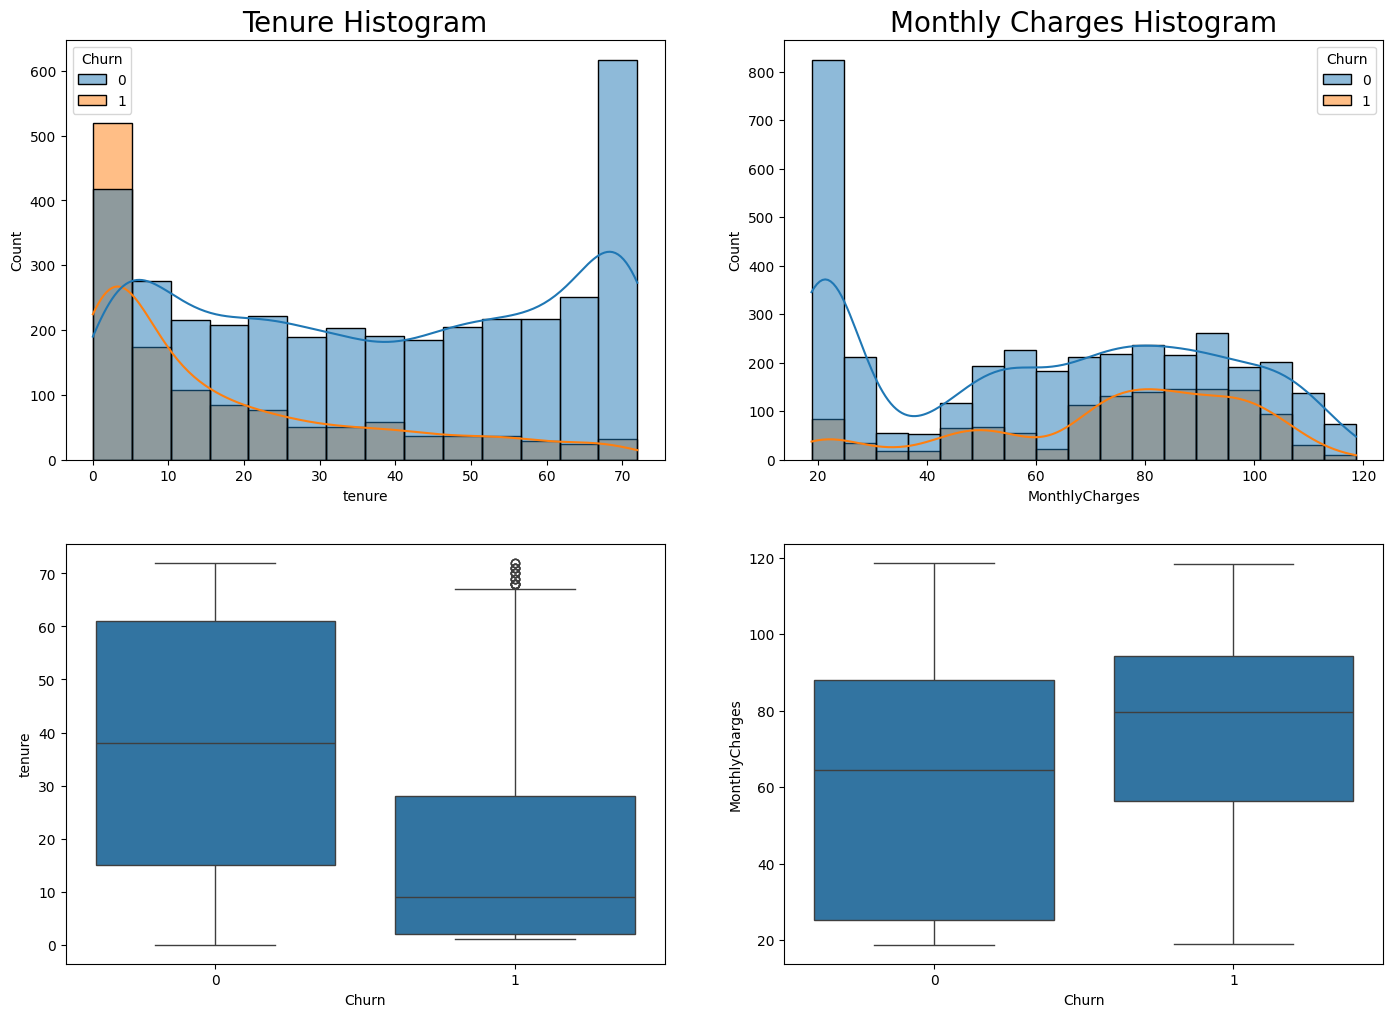

In [92]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='tenure',hue='Churn',kde=True)
plt.title('Tenure Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True)
plt.title('Monthly Charges Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='tenure', x='Churn')

plt.subplot(224)
sns.boxplot(data=df,y='MonthlyCharges', x='Churn')
plt.show()

The visualizations show clear patterns related to customer churn. From the tenure histograms and boxplots, we can see that customers who churn usually have much shorter tenure—many of them leave within the first few months. In contrast, customers who stay tend to have been with the company much longer, especially those above 60 months. This makes tenure a strong indicator of churn risk. Meanwhile, the monthly charges plots show that churned customers generally pay higher monthly fees compared to those who stay. Their distribution is centered around the higher price range, and the boxplot confirms that churners have a higher median charge. Overall, the plots indicate that newer customers and those paying higher monthly bills are more likely to churn, while long-term customers with lower charges tend to stay loyal.

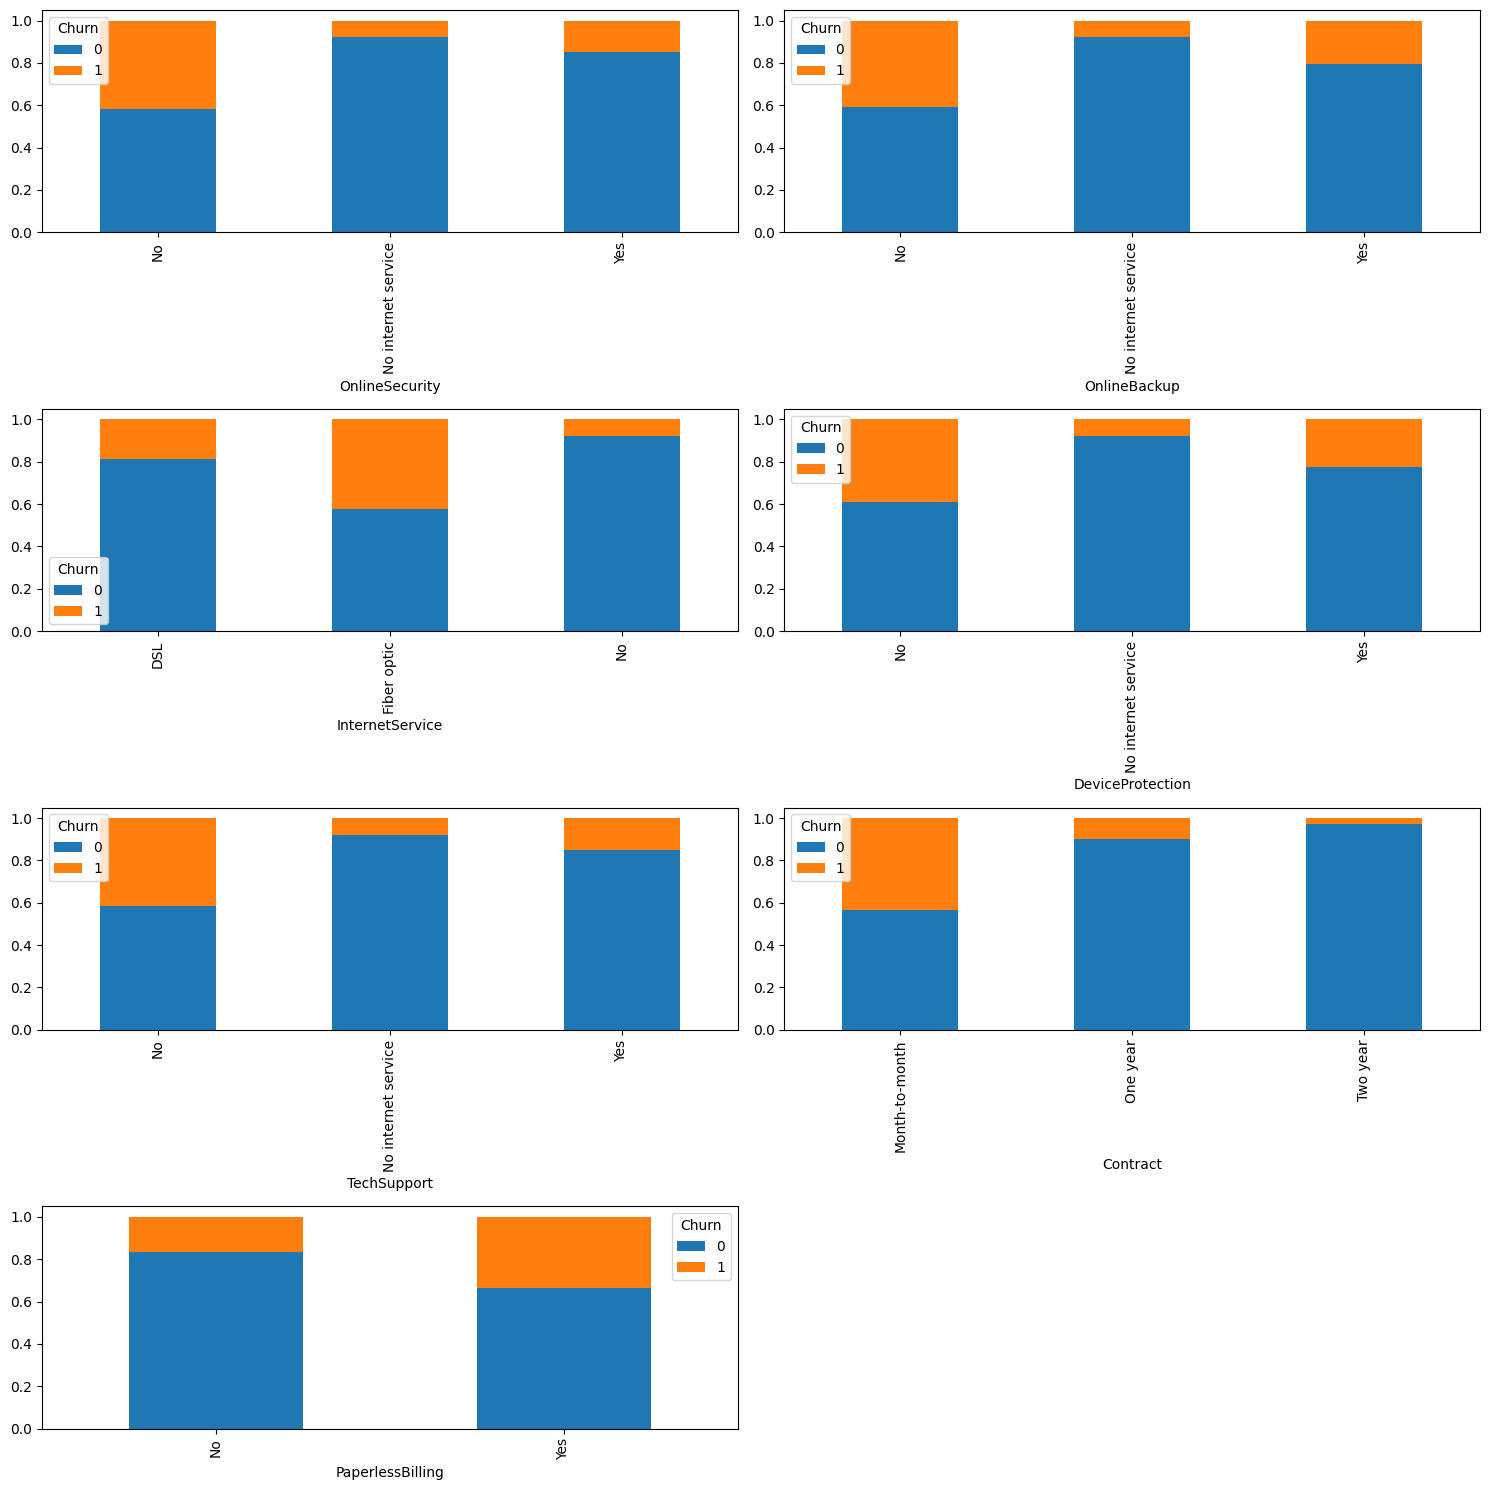

In [93]:
count = 0
fig = plt.figure(figsize=(15,15))

for i in df.drop(columns=['Churn','MonthlyCharges','tenure']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [94]:
for i in df.drop(columns=['Churn','MonthlyCharges','tenure']).columns:
    relevent_experience_df = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by=[1.0], ascending=False))

Churn,0,1
OnlineSecurity,,
No,0.582004,0.417996
Yes,0.852059,0.147941
No internet service,0.922053,0.077947


Churn,0,1
OnlineBackup,,
No,0.592541,0.407459
Yes,0.795428,0.204572
No internet service,0.922053,0.077947


Churn,0,1
InternetService,,
Fiber optic,0.578269,0.421731
DSL,0.813599,0.186401
No,0.922053,0.077947


Churn,0,1
DeviceProtection,,
No,0.610704,0.389296
Yes,0.773641,0.226359
No internet service,0.922053,0.077947


Churn,0,1
TechSupport,,
No,0.586542,0.413458
Yes,0.848335,0.151665
No internet service,0.922053,0.077947


Churn,0,1
Contract,,
Month-to-month,0.567071,0.432929
One year,0.899240,0.100760
Two year,0.972342,0.027658


Churn,0,1
PaperlessBilling,,
Yes,0.664863,0.335137
No,0.835276,0.164724


The barplots and tables show how different service features relate to customer churn. For several features like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, the pattern is consistent: customers who do not use these services have a much higher churn rate. For example, customers without OnlineSecurity have about 42% churn, while those who have it churn only around 15%. A similar trend appears for OnlineBackup and DeviceProtection—people who subscribe to these add-on services are less likely to leave. Customers who don’t use internet service at all have the lowest churn overall, which makes sense because they usually subscribe to fewer services and have simpler plans.

- Internet service type also plays a big role. Fiber optic users have the highest churn rate at around 42%, while DSL users churn less (about 18%). This suggests that fiber optic customers—who usually pay more—might be more sensitive to pricing or performance issues.

- The strongest churn indicator is the Contract type. Month-to-month contracts have a very high churn rate (about 43%), while one-year and two-year contracts show dramatically lower churn (around 10% and 2%). This clearly shows that longer contracts lock customers in and improve retention.

- Lastly, customers who use PaperlessBilling churn more often than those who receive paper bills. Paperless billing users have about 33% churn, compared to only 16% for non-paperless users. This might reflect that digital-savvy customers switch providers more easily.

Overall, the charts and tables highlight a clear story: customers with fewer services, higher flexibility (like month-to-month contracts), or higher-cost services tend to churn more, while customers with bundled services and longer commitments are much more likely to stay.

In [95]:
InternetService_df = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
InternetService_df['count'] = df.groupby('InternetService')['Churn'].count()
display(InternetService_df.sort_values(by=[1], ascending=False))

Churn,0,1,count
InternetService,,,
Fiber optic,0.578269,0.421731,2172
DSL,0.813599,0.186401,1706
No,0.922053,0.077947,1052


This step calculates the churn distribution for each type of internet service. The code groups the data by InternetService and computes the proportion of customers who churn and who stay. It also adds the total number of customers in each service category. After that, the table is sorted by the churn rate so we can easily see which internet service type has the highest percentage of churn. This helps us understand how churn varies across different service types.

# Section 6 Data Preparation

In [96]:
df.head()

,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0


The Contract column is treated as an ordinal feature because the categories have a clear order based on how long the customer’s contract lasts. Month-to-month customers have the shortest commitment and can cancel easily, while One-year and Two-year contracts represent longer commitments and generally more loyal customers.
So the values are converted into 0, 1, and 2 to reflect this order — the higher the number, the longer the contract, and the lower the likelihood of churn.

In [97]:
ordinal_mapping = [
    {'col':'Contract',
    'mapping':{
        'Month-to-month' : 0,
        'One year' : 1,
        'Two year' : 2 
    }}
]

In [98]:
num_features = ['tenure', 'MonthlyCharges']

cat_features = ['InternetService', 'Contract', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'PaperlessBilling']

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


In [99]:
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('scaler', StandardScaler())
])


In [100]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['InternetService']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['Contract']),
    ('binary', ce.BinaryEncoder(), ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling'])
], remainder='passthrough')

In [101]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=24)

In [103]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__InternetService_Fiber optic,onehot__InternetService_No,ordinal__Contract,binary__OnlineSecurity_0,binary__OnlineSecurity_1,binary__OnlineBackup_0,binary__OnlineBackup_1,binary__DeviceProtection_0,binary__DeviceProtection_1,binary__TechSupport_0,binary__TechSupport_1,binary__PaperlessBilling_0,binary__PaperlessBilling_1,remainder__tenure,remainder__MonthlyCharges
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,13.0,70.15
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,36.0,94.70
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,75.10
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,6.0,82.85
4,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,66.0,66.10


## 6.1 Modelling & Evaluation 

In [104]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### 6.1.1 Model Benchmarking : K-Fold

In [105]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266878 -> initscore=-1.010521
[LightGBM] [Info] Start training from score -1.010521


/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266878 -> initscore=-1.010521
[LightGBM] [Info] Start training from score -1.010521


/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266878 -> initscore=-1.010521
[LightGBM] [Info] Start training from score -1.010521


/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 843, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267195 -> initscore=-1.008901
[LightGBM] [Info] Start training from score -1.008901


/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 843, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 3156, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267110 -> initscore=-1.009334
[LightGBM] [Info] Start training from score -1.009334


/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,mean roc_auc,sdev
model,,
Logistic Regression,0.841885,0.012712
LightGBM,0.825880,0.011161
XGBoost,0.812063,0.010956
Random Forest,0.801417,0.008761
KNN,0.779198,0.013172
Decision Tree,0.646957,0.009293


Based on the ROC AUC mean test, it appears that Logistic Regression model has the best mean ROC AUC score (Baseline Model) using default hyperparameter.

### 6.1.2 Model Benchmarking : Test Data

In [106]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       723
           1       0.62      0.55      0.58       263

    accuracy                           0.79       986
   macro avg       0.73      0.71      0.72       986
weighted avg       0.78      0.79      0.79       986

KNN 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       723
           1       0.55      0.52      0.53       263

    accuracy                           0.76       986
   macro avg       0.69      0.68      0.68       986
weighted avg       0.75      0.76      0.76       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       723
           1       0.48      0.47      0.47       263

    accuracy                           0.72       986
   macro avg       0.64      0.64      0.64       986
weighted avg       0.72      0

/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,roc_auc score
model,
Logistic Regression,0.842103
LightGBM,0.828734
XGBoost,0.819749
Random Forest,0.806652
KNN,0.785082
Decision Tree,0.652196


## 6.2 Test Oversampling with K-Fold 

In [107]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [108]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=24)

In [109]:
data = x_train
target = y_train

In [110]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
    # oversampling (RandomOverSampler)
    ros = RandomOverSampler()
    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model (Logistic Regression instead of LGBM)
    logreg = LogisticRegression(max_iter=1000, solver='lbfgs')

    # pipeline: preprocess + model
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', logreg)
    ])

    # calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append results
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)


## 6.3 Evaluation Metrics without Oversampling


In [ ]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.795717,0.810127,0.845042,0.829226,0.724545,0.731241,0.538543,0.500000,0.639098,0.706667
1,0.797126,0.797468,0.841840,0.857217,0.725059,0.722807,0.534319,0.518868,0.644586,0.654762
2,0.797126,0.784810,0.843226,0.841712,0.724843,0.714520,0.533263,0.537736,0.644955,0.612903
3,0.797408,0.794937,0.844687,0.830936,0.725333,0.722316,0.533755,0.533333,0.646232,0.636364
4,0.796056,0.804569,0.843411,0.841967,0.723123,0.737640,0.529536,0.561905,0.643590,0.655556
5,0.796620,0.804569,0.840344,0.871247,0.723016,0.737640,0.526371,0.561905,0.646373,0.655556
6,0.798873,0.789340,0.845003,0.828687,0.727161,0.724626,0.535865,0.571429,0.649616,0.612245
7,0.797465,0.794416,0.843114,0.846548,0.727270,0.716035,0.543249,0.504762,0.642946,0.646341
8,0.798873,0.791878,0.845179,0.826578,0.727800,0.719636,0.539030,0.533333,0.648477,0.629213
9,0.798592,0.789340,0.843323,0.842923,0.727100,0.717196,0.536920,0.533333,0.648408,0.622222


## 6.4 Evaluation Metrics with Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.759224,0.734177,0.845642,0.829552,0.758864,0.705117,0.797848,0.783019,0.740635,0.503030
1,0.753843,0.769620,0.838519,0.855487,0.753468,0.736522,0.792852,0.773585,0.735472,0.550336
2,0.755188,0.756962,0.843079,0.841875,0.754921,0.724819,0.788240,0.773585,0.739366,0.532468
3,0.770088,0.698734,0.850168,0.830049,0.769800,0.672396,0.805459,0.780952,0.752244,0.460674
4,0.760761,0.730964,0.844710,0.841737,0.760565,0.703457,0.789393,0.800000,0.746638,0.497041
5,0.754612,0.766497,0.837506,0.871379,0.754245,0.740827,0.793236,0.847619,0.736354,0.539394
6,0.762490,0.715736,0.846511,0.826940,0.762088,0.687726,0.803613,0.780952,0.742543,0.479532
7,0.758071,0.738579,0.842013,0.847504,0.757778,0.708268,0.792852,0.780952,0.741286,0.506173
8,0.763451,0.730964,0.845853,0.827764,0.763024,0.701387,0.805919,0.780952,0.742827,0.496970
9,0.764220,0.746193,0.847039,0.844703,0.763868,0.717279,0.802844,0.800000,0.745273,0.515337


From the evaluation metrics without oversampling, the model shows a clear gap between the performance on the training data and the validation data. The training metrics (accuracy, ROC-AUC, F1, recall, and precision) are noticeably higher than the validation metrics, which suggests that the model may be slightly overfitting to the original imbalanced dataset. Because the minority class (churn) is underrepresented, the model struggles to detect churn correctly, leading to lower recall on the test folds. In other words, the model performs well on majority-class customers but has trouble recognizing churners.
When oversampling is applied, the evaluation metrics improve, especially recall. The recall on the validation set becomes significantly higher compared to the model without oversampling, meaning the model is now better at catching churners. This is important because recall is a key metric in churn prediction—missing a real churner is more costly than incorrectly predicting churn. The F1 score and ROC-AUC on the validation set also improve or stay more consistent, showing that oversampling helps balance the model’s ability to detect both classes. Overall, oversampling makes the model more stable and more effective at identifying at-risk customers, without causing severe overfitting.

## 6.5 Classification Reports without Oversampling

In [ ]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       289
           1       0.71      0.50      0.59       106

    accuracy                           0.81       395
   macro avg       0.77      0.71      0.73       395
weighted avg       0.80      0.81      0.80       395

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       289
           1       0.65      0.52      0.58       106

    accuracy                           0.80       395
   macro avg       0.75      0.71      0.72       395
weighted avg       0.79      0.80      0.79       395

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       289
           1       0.61      0.54      0.57       106

    accuracy                           0.78       395
   macro avg       0.73      0.71      0.71       395
weighted avg       0.78      0.78      0.78       395

              preci

## 6.6 Classification Reports with Oversampling

In [ ]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       289
           1       0.50      0.78      0.61       106

    accuracy                           0.73       395
   macro avg       0.70      0.75      0.71       395
weighted avg       0.79      0.73      0.75       395

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       289
           1       0.55      0.77      0.64       106

    accuracy                           0.77       395
   macro avg       0.73      0.77      0.74       395
weighted avg       0.81      0.77      0.78       395

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       289
           1       0.53      0.77      0.63       106

    accuracy                           0.76       395
   macro avg       0.72      0.76      0.72       395
weighted avg       0.80      0.76      0.77       395

              preci

The classification reports show that the model performs very well for class 0 (non-churn), but has more difficulty with class 1 (churn). For the non-churn class, the model reaches a high precision of around 0.90, meaning most of the customers predicted as non-churn are actually correct. The recall for this class sits around 0.75–0.77, which means the model is able to correctly identify most non-churn customers.
For the churn class, the model behaves differently. Precision is lower, around 0.53–0.55, which means that when the model predicts a customer will churn, it's only right about half the time. However, recall for churn is quite strong at 0.77, meaning the model successfully catches a large portion of actual churners. This is important in churn prediction because missing a churner is usually more costly than a false alarm.
Overall accuracy sits around 0.76–0.77, but accuracy alone doesn’t tell the full story due to class imbalance. The macro and weighted averages show that the model is reasonably balanced, but still performs better on the majority class. The key takeaway is: the model is good at detecting churners (high recall), although it sacrifices some precision, which is often acceptable for churn prevention, where catching as many at-risk customers as possible is the priority.

# Section 7 Tuning Ensemble Model

We use LightGBM because it’s one of the fastest and most powerful models for tabular data like this. It handles large datasets, mixed feature types, and complex patterns really well without requiring heavy preprocessing. LightGBM is also great at dealing with imbalanced data, especially when we add class_weight='balanced', which makes it better at detecting churners — the minority class.
Compared to simpler models like logistic regression or decision trees, LightGBM can capture deeper relationships between features, and compared to XGBoost, it usually trains faster while giving similar or even better performance. Overall, LightGBM gives us high accuracy, strong recall for churn prediction, and clear feature importance using SHAP, making it a solid choice for this problem.

## 7.1 LGBM Model

In [ ]:
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

final_lgbm = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    random_state=24,
    class_weight='balanced'
)

final_pipeline = Pipeline([
    ('preprocess', transformer),
    ('model', final_lgbm)
])

final_pipeline.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 1053, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('ordinal', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred = final_pipeline.predict(x_test)
y_pred_proba = final_pipeline.predict_proba(x_test)[:, 1]

print("✅ Final LightGBM Classification Report:\n")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

✅ Final LightGBM Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       723
           1       0.51      0.74      0.61       263

    accuracy                           0.74       986
   macro avg       0.70      0.74      0.71       986
weighted avg       0.79      0.74      0.75       986

ROC-AUC Score: 0.826362484157161


/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_preprocessed = final_pipeline.named_steps['preprocess'].transform(x_test)
feature_names = final_pipeline.named_steps['preprocess'].get_feature_names_out()


In [ ]:
explainer = shap.TreeExplainer(final_pipeline.named_steps['model'])
shap_values = explainer.shap_values(X_preprocessed)


/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


## 7.2 Feature Importance

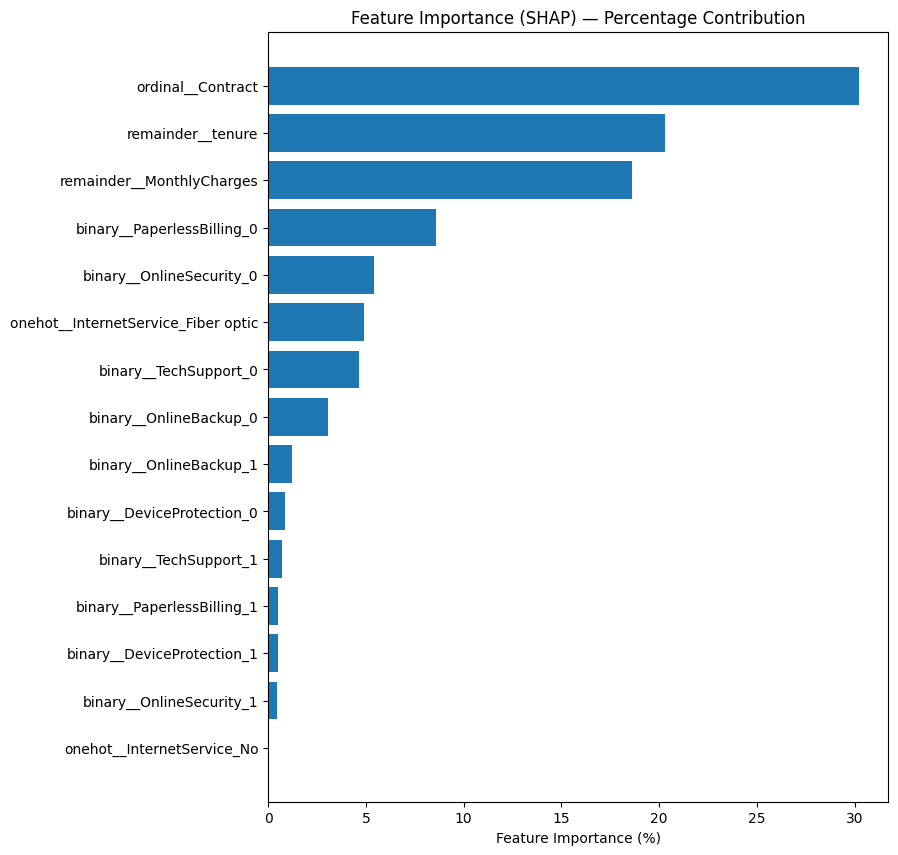

In [ ]:
# Hitung mean absolute SHAP value per fitur
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Konversi ke persen
shap_percent = 100 * mean_abs_shap / mean_abs_shap.sum()

# Buat dataframe biar rapih
shap_percent_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP (%)': shap_percent
}).sort_values(by='SHAP (%)', ascending=False)

# Barplot versi SHAP, tapi dalam persen
plt.figure(figsize=(8, 10))
plt.barh(shap_percent_df['Feature'], shap_percent_df['SHAP (%)'])
plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance (SHAP) — Percentage Contribution")
plt.gca().invert_yaxis()  # biar ranking tertinggi di atas
plt.show()


This SHAP barplot shows which features contribute the most to the model’s predictions, expressed in percentages. The Contract feature stands out as the most influential by a wide margin, meaning the type of contract a customer has plays the biggest role in predicting whether they churn or stay. Next comes tenure, which makes sense because customers who have been with the company longer are less likely to leave. MonthlyCharges is also a major factor, showing that higher or lower monthly fees strongly affect churn behavior.
After the top three, the influence becomes smaller but still meaningful. Features like PaperlessBilling, OnlineSecurity, InternetService (Fiber optic), and TechSupport all contribute to the model’s predictions, though not as strongly as the main factors. These smaller contributions capture patterns such as customers without security or support services being more likely to churn.
Overall, the plot tells us that churn is mainly driven by contract length, how long the customer has been with the company, and how much they pay each month, while service-related features add supporting information for the model.

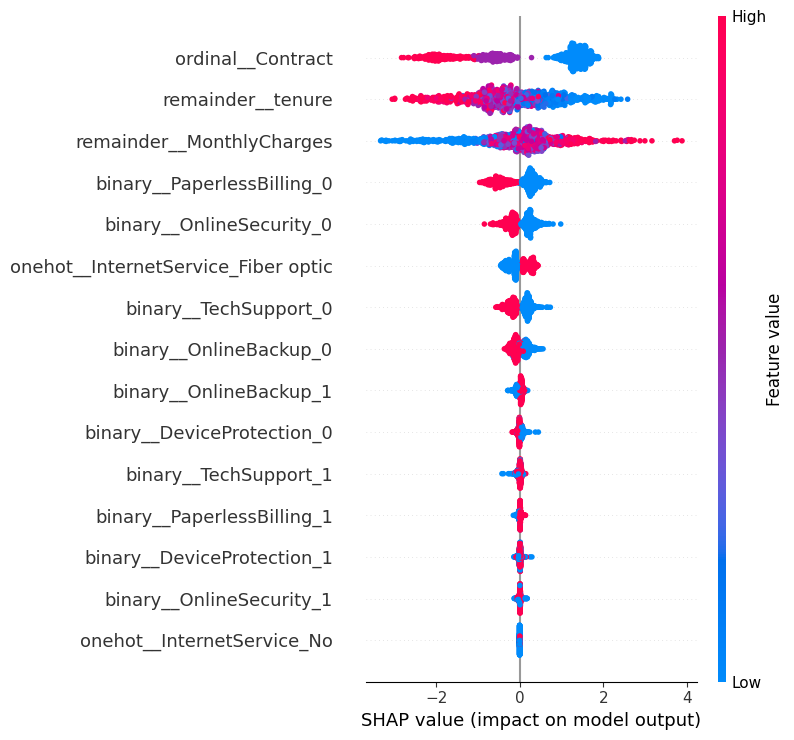


🔹 Top 10 Most Influential Features for Churn Prediction:


,Feature,Mean |SHAP value|
2,ordinal__Contract,1.296138
13,remainder__tenure,0.872004
14,remainder__MonthlyCharges,0.798816
11,binary__PaperlessBilling_0,0.367429
3,binary__OnlineSecurity_0,0.232095
0,onehot__InternetService_Fiber optic,0.209937
9,binary__TechSupport_0,0.199446
5,binary__OnlineBackup_0,0.131472
6,binary__OnlineBackup_1,0.052371
7,binary__DeviceProtection_0,0.037830


In [ ]:
shap.summary_plot(shap_values, X_preprocessed, feature_names=feature_names)

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP value|': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean |SHAP value|', ascending=False)

print("\n🔹 Top 10 Most Influential Features for Churn Prediction:")
display(importance_df.head(10))


The SHAP summary plot shows how each feature affects the model’s prediction for churn, both in terms of impact and direction. At the top, Contract clearly has the strongest influence, meaning the type of contract a customer has is the biggest factor in determining whether they churn. The plot shows that lower contract values (like month-to-month, shown in red) push the model strongly toward predicting churn, while higher contract values (one-year or two-year contracts, shown in blue) push the prediction toward not churn. This aligns perfectly with what we saw in the EDA.
Right after Contract, tenure is another major factor. Customers with short tenure (blue dots) push the model toward churn, while customers with longer tenure (red dots) make the model predict they will stay. This makes sense — new customers tend to churn more easily than those who’ve been loyal for years.
MonthlyCharges also plays a big role. Higher monthly charges (red) often push predictions toward churn, showing that customers paying more are more likely to leave. This supports the earlier observation that high-cost customers feel more pressure to switch providers.
The next set of features — PaperlessBilling, OnlineSecurity, Fiber optic service, TechSupport, OnlineBackup, and DeviceProtection — have smaller but still meaningful impacts. Generally, not having these services (often shown as “_0”) increases churn risk. For example, customers without OnlineSecurity or TechSupport often contribute positively to the churn prediction. The plot also shows that Fiber optic users lean more toward churn compared to DSL customers.


## 7.3 Confusion Matrix

<Figure size 600x500 with 0 Axes>

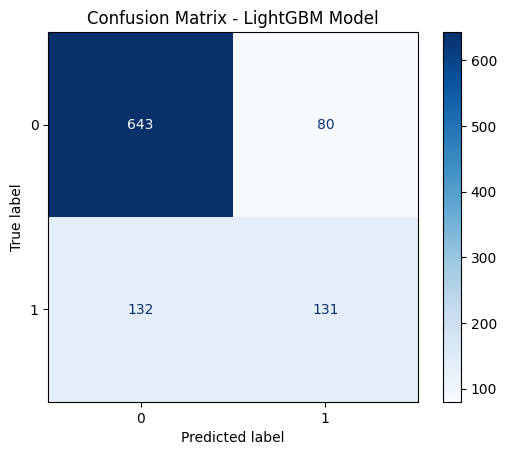

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - LightGBM Model")
plt.show()


The confusion matrix shows how well the LightGBM model classified churn and non-churn customers. The top left number (643) represents customers who actually did not churn and were correctly predicted as non churn, which shows really good prediction. On the top right, there are 80 customers who didn’t churn but the model mistakenly predicted they would.
On the bottom left, we have 132 actual churners that the model failed to detect (false negatives). These are the customers the company should have caught but didn’t ideally this number should be lower. Lastly, the bottom right value (131) shows the churn customers that were correctly identified.
Overall, the model does very well at identifying non churn customers, and it catches a decent amount of churners too, although there's still room to improve the recall for the churn class.

# Section 8 Business Impact & Recommendation

## 8.1 Business Impact

The results of this analysis give PT Telco a very clear picture of where churn is coming from and how the company can respond. The model highlights specific high risk groups especially month to month customers, users with short tenure, customers paying higher monthly charges, and those who don’t subscribe to add on services like OnlineSecurity or TechSupport. These insights allow PT Telco to focus its retention efforts more efficiently, targeting the customers who genuinely need attention instead of spreading marketing resources too broadly. The strong influence of contract type suggests that promoting contract upgrades or bundled long term plans could significantly reduce churn. Short tenure customers also emerge as a vulnerable group, meaning early stage onboarding and support programs can help prevent new customers from leaving too quickly. Higher monthly charges being linked to churn indicates that pricing adjustments, flexible plans, or value added bundles may help retain price-sensitive users. Meanwhile, since users with more add on services tend to stay, the company can encourage service bundling to increase customer stickiness. Overall, the LightGBM model offers a reliable way to identify at risk customers, helping PT Telco reduce churn more strategically, lower retention costs, and maximize customer lifetime value.

## 8.2 Recommendation

Based on the results of this project, several actions can help PT Telco effectively reduce customer churn. Since contract type is the strongest factor, the company should prioritize encouraging month to month customers to switch to longer term contracts by offering discounts, loyalty points, or bundled deals. This is the segment with the highest churn risk, so even a small improvement here can significantly reduce churn rates. For customers with short tenure another highly vulnerable group PT Telco should strengthen early engagement strategies such as onboarding support, welcome offers, or personalized check ins during the first 3 6 months. These early touches help build loyalty before customers start considering switching.
Because higher monthly charges are linked to higher churn, it’s also recommended to revisit the pricing strategy. PT Telco could offer flexible plans, usage based billing, or targeted price adjustments for high paying customers who show signs of dissatisfaction. The analysis also shows that customers with add on services like OnlineSecurity, TechSupport, and OnlineBackup churn much less, so the company should actively promote these services through free trials or discounted bundles to boost retention.
Finally, the LightGBM model can be deployed as an early-warning system, allowing PT Telco to focus retention efforts on the customers most likely to churn instead of treating all customers equally. This targeted approach reduces unnecessary marketing spend and helps teams reach the right customers at the right time. By combining contract optimization, early engagement, pricing adjustments, and service bundling with a data driven churn prediction system, PT Telco can significantly improve customer loyalty and long-term revenue stability.

# Section 9 Conclusion

This project successfully identifies the key drivers of customer churn at PT Telco and builds a strong predictive model using LightGBM to detect at-risk customers. The analysis shows that contract type, tenure, and monthly charges are the most influential factors, supported by patterns found in the exploratory data analysis. Service-related features like OnlineSecurity, TechSupport, and OnlineBackup also play an important role in stabilizing customer retention. With these insights and the churn prediction model, PT Telco can implement more targeted and cost-efficient retention strategies to reduce churn, improve customer satisfaction, and increase long-term customer lifetime value.